Step 1: **Setup and Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Set the aesthetics for the plots
sns.set(style="whitegrid")

Step 2:**load the** **dataset**

In [6]:
#Load the dataset
titanic_df=pd.read_csv('titanic.csv')

Step 3: **Data Cleaning**
        

*   **1.Insecpt the Data**







In [9]:
#Display the first dew rows of the dataset
print(titanic_df.head())
#Get a summary of the dataset
print(titanic_df.info())
#Check for missing values
print(titanic_df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c





  
*   **2.Handle Missing Values**







In [10]:
#Fill missing 'Age' values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)

#Fill 'Embarked' values with the most common port of embarkation
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

#Drop 'Cabin' column as it has too many missing values
titanic_df.drop(columns=['Cabin'],inplace=True)

#Drop rows with missing 'Fare' values
titanic_df.dropna(subset=['Fare'],inplace=True)

<ipython-input-10-1663125460>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)
<ipython-input-10-1663125460>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru



*   **3.Correct Data Types**



In [11]:
#Convert 'Survived','Pclass' to categorical data types
titanic_df['Survived']=titanic_df['Survived'].astype('category')
titanic_df['Pclass']=titanic_df['Pclass'].astype('category')

Step 4: **Exploratory Data Analysis(EDA)**


*  **1.Distribution of Numerical Features**



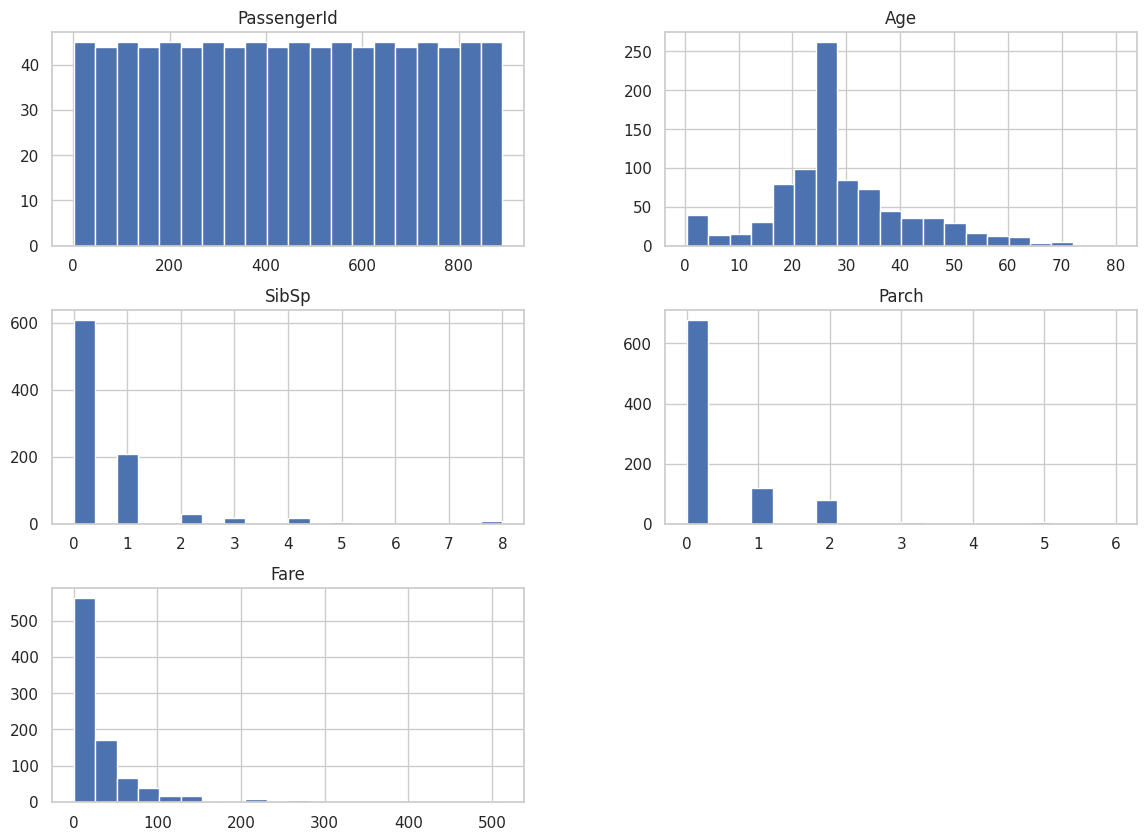

In [12]:
#Plot histograms for numerical features
titanic_df.hist(bins=20,figsize=(14,10))
plt.show()




* **2.Count plot for Categorical Features**  




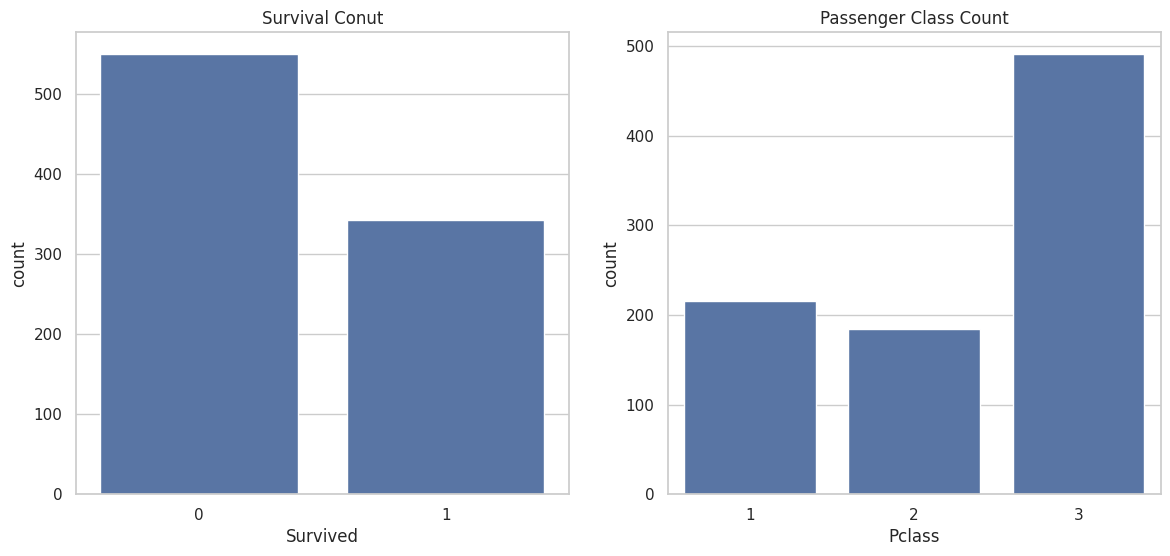

In [13]:
#plot count plots for categorical features
plt.figure(figsize=(14,6))

#Survived
plt.subplot(1,2,1)
sns.countplot(data=titanic_df,x='Survived')
plt.title('Survival Conut')

#Pclass
plt.subplot(1,2,2)
sns.countplot(data=titanic_df,x='Pclass')
plt.title('Passenger Class Count')

plt.show()






*  **3.Survival Rate by Passenger Class**


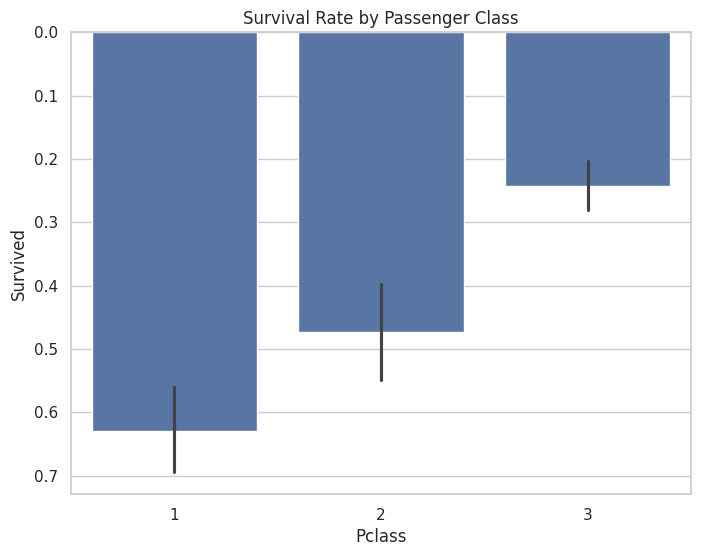

In [14]:
#Plot suvival rate by Passenger class
plt.figure(figsize=(8,6))
sns.barplot(data=titanic_df,x='Pclass',y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()




*   **4.Survival Rate by Sex**




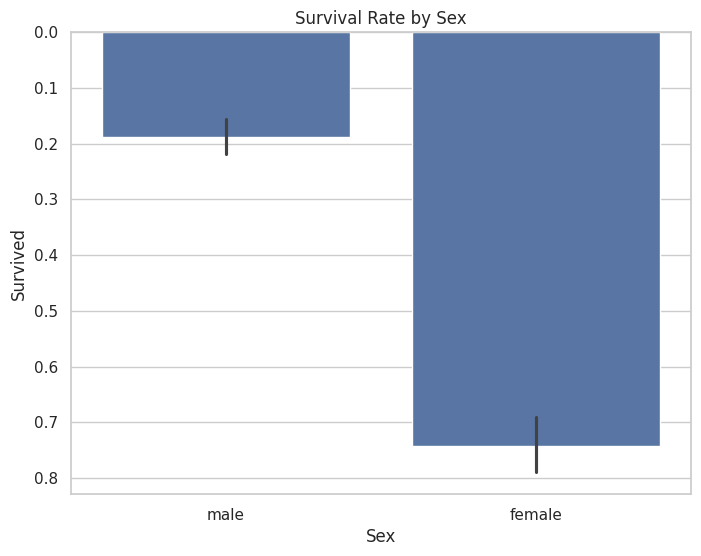

In [15]:
#Plot survival rate by sex
plt.figure(figsize=(8,6))
sns.barplot(data=titanic_df,x='Sex',y='Survived')
plt.title('Survival Rate by Sex')
plt.show()



* **5.Age Distribution by Survival**  




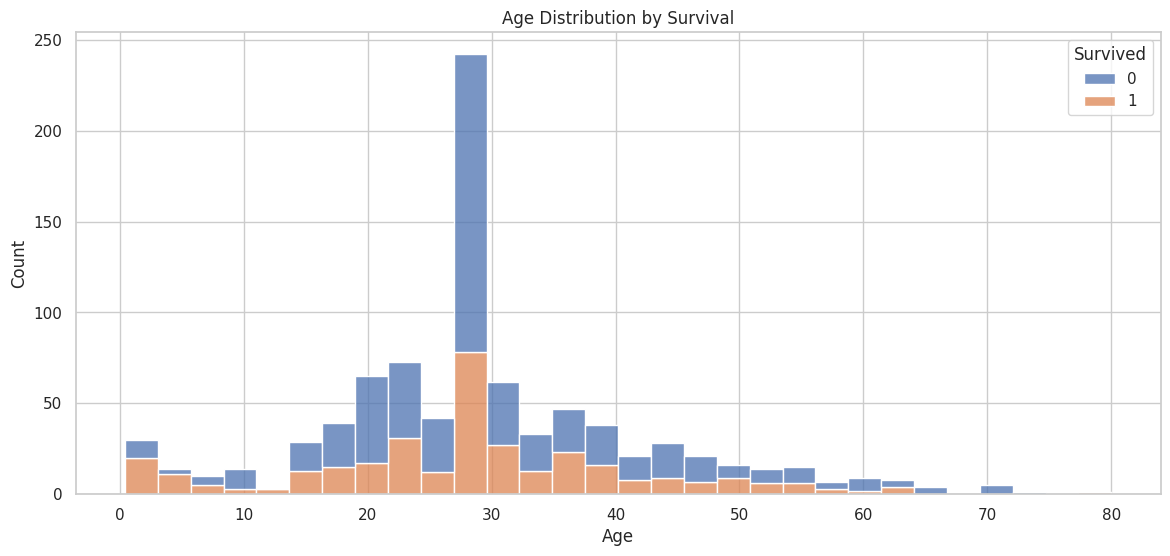

In [17]:
#plot age distribution by survival
plt.figure(figsize=(14,6))
sns.histplot(data=titanic_df,x='Age',hue='Survived',multiple='stack',bins=30)
plt.title('Age Distribution by Survival')
plt.show()



*  **6.Correlation Matrix**




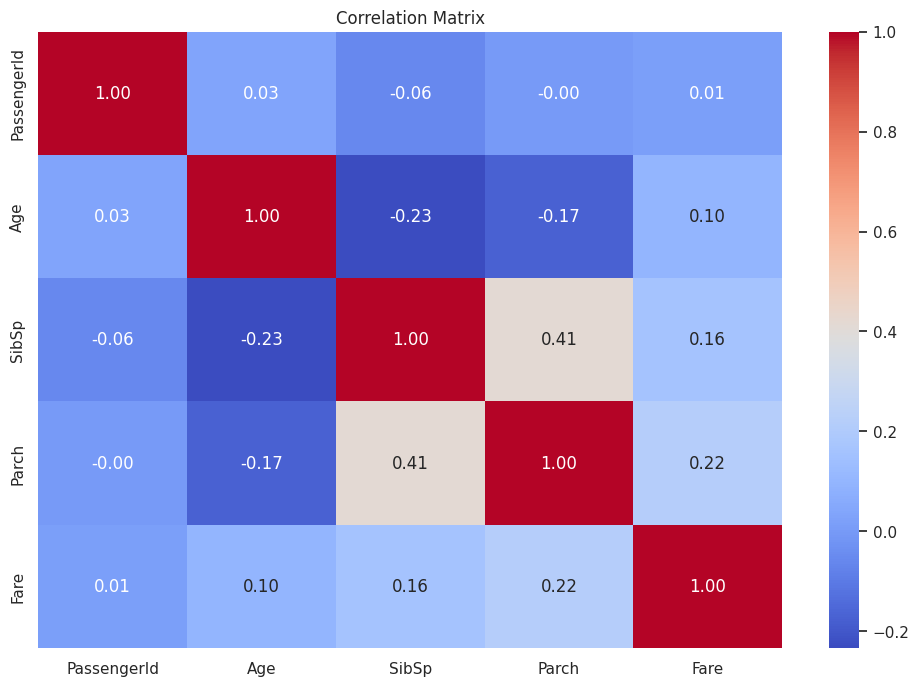

In [19]:
#plot correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()